# Perkenalan

Nama : Rizqi Golda

Objective : Menurut laporan dari `Surti Risanti` di (https://www.fortuneidn.com/finance/surti/skor-kredit-yang-bagus?page=all), ada beberapa kondisi yang mempengaruhi skor kredit. skor kredit adalah sebuah angka yang merefleksikan seberapa baik seseorang dalam mengelola kewajiban keuangannya, seperti tagihan kartu kredit, pinjaman, dan pembayaran cicilan. Skor kredit digunakan oleh lembaga keuangan, seperti bank atau kreditur, untuk menilai risiko kredit seseorang, yaitu kemungkinan seseorang untuk membayar kembali utang mereka tepat waktu. dengan dataset yang saya miliki, maka saya akan mencoba membuat model untuk mengetahui apakah orang tersebut gagal bayar agunan atau tidak.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
import json
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib as mpl
from sklearn.cluster import KMeans
from matplotlib.ticker import FixedLocator, FixedFormatter

# SQL query

SELECT
   *

FROM
   `ftds-hacktiv8-project`.phase1_ftds_018_rmt.`credit-card-information`
   
WHERE
   MOD (CUST_ID, 2) = 0

# Data loading

mengambil data yang diperlukan dari `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information` yang telah disimpan di lokal dalam bentuk `csv`

In [2]:
dataSheet = pd.read_csv('file:///home/ubuntu/Downloads/h8dsft_P1G4_golda.csv')


melihat 10 data teratas.

In [3]:
dataSheet.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


melihat 10 data terakhir

In [4]:
dataSheet.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


# Exploratory Data Analysis (EDA)

### melihat informasi sederhana

melihat informasi sederhana dari datasheet yang dipunya

In [5]:
dataSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Diketahui dari informasi di atas terdapat 17 kolom dengan 4475 baris data di dalam dataframe

### deskripsi singkat

mengecek informasi sederhana dari datasheet tersebut.

In [6]:
dataSheet.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


### histogram singkat

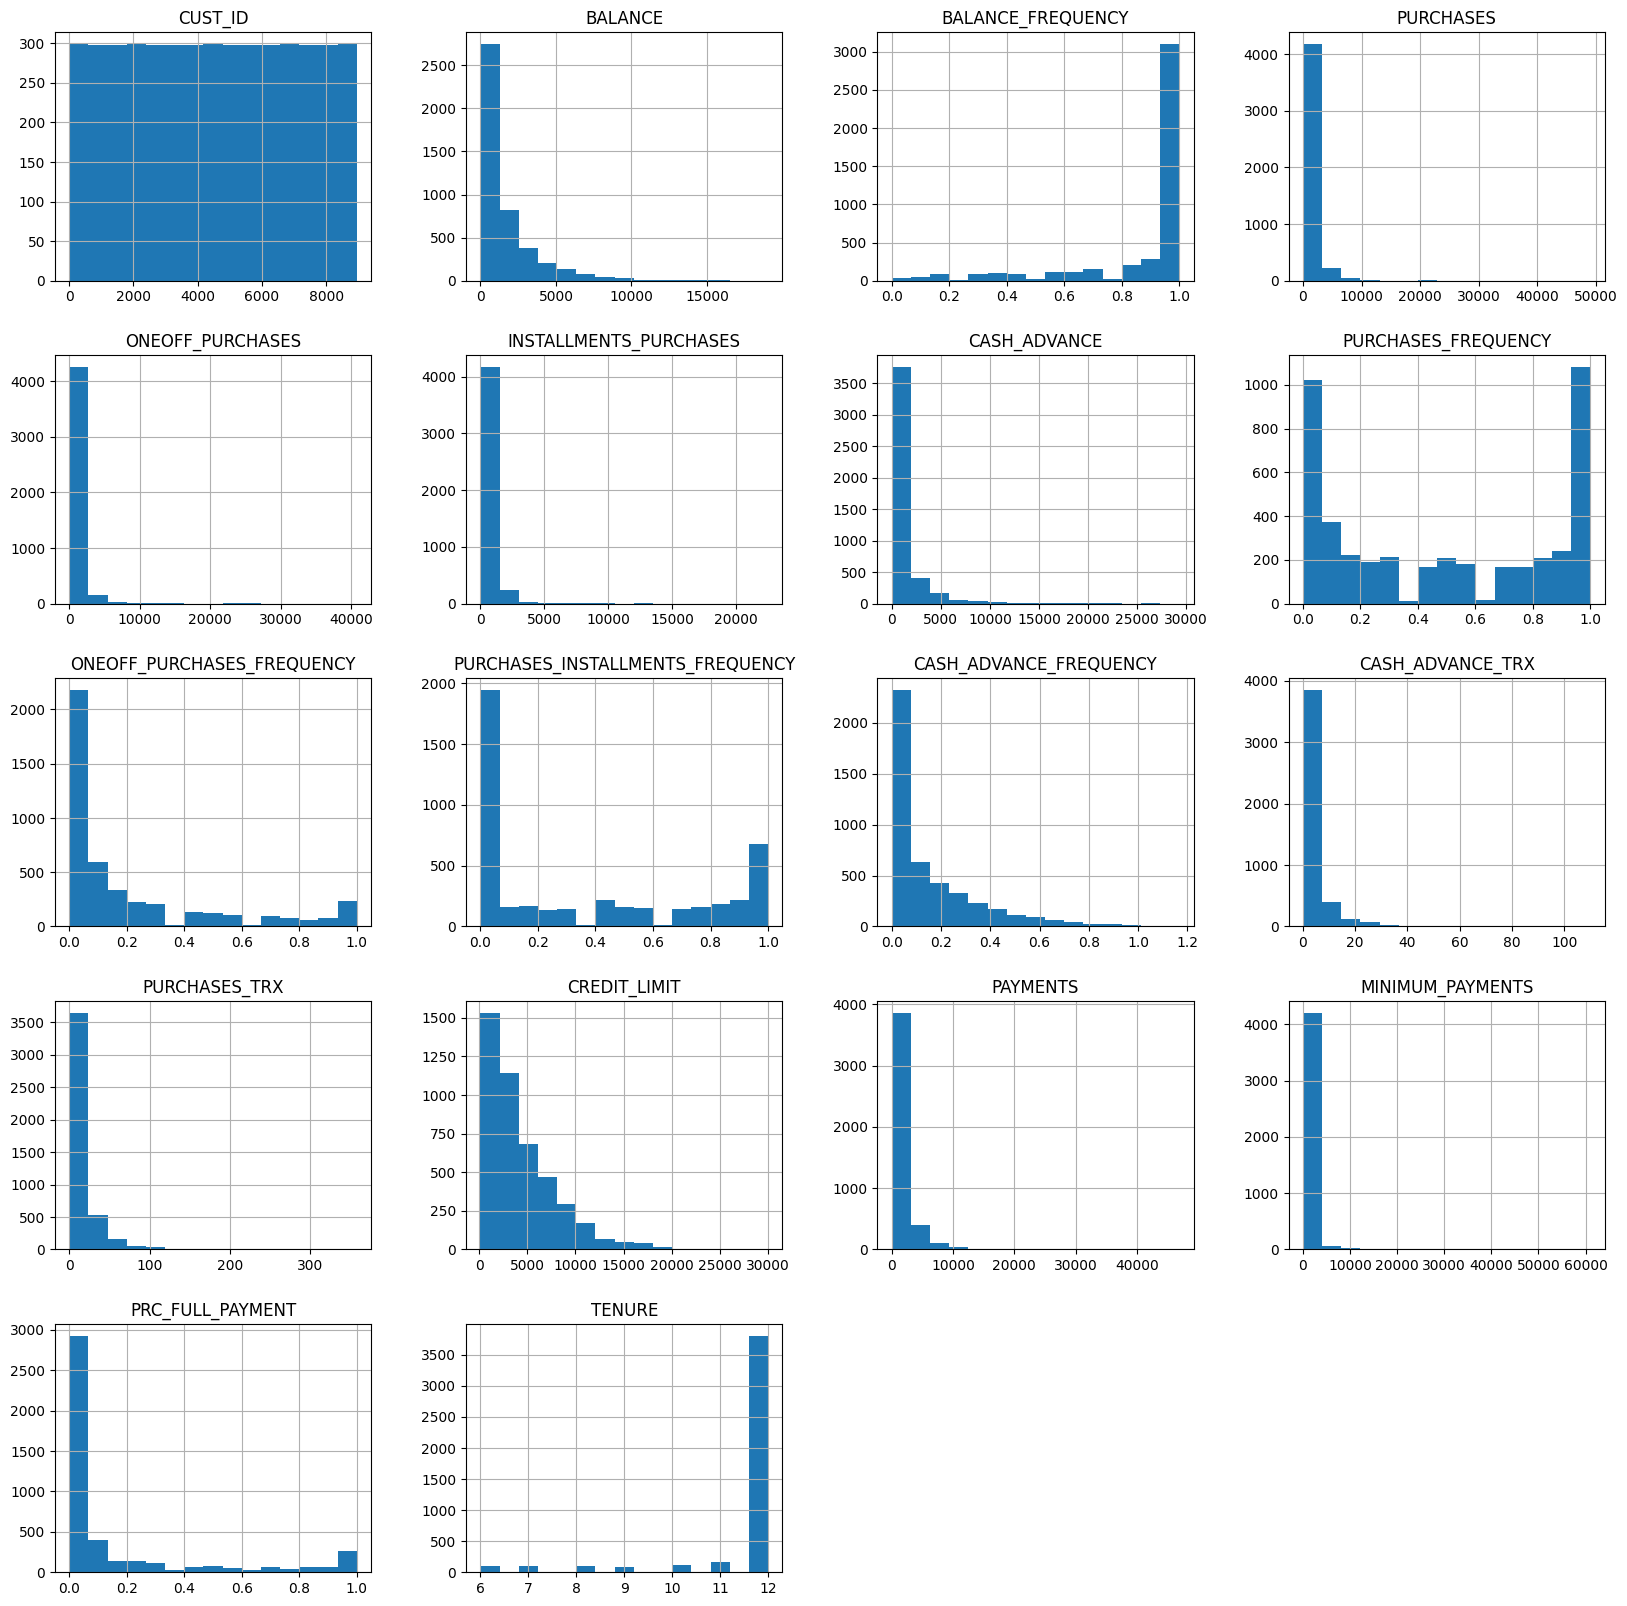

In [7]:
dataSheet.hist(bins=15, figsize=(20, 20))
plt.show()

dari tabel histogram diatas, didapati bahwa data `balance` berkisar dari 0 sampai 19000 dengan modus di kisaran 0 sampai 1250. untuk frequensi transaksi yang berkisar dari skala 0-1, didapati bahwa nasabah banyak yang memakai kartu kredit dengan dilihat dari seringnya jumlah transaksi yang dilakukan. sementara untuk data pembelian didapati bahwa jumlah transaksi yang dikeluarkan setiap nasabah berkisar antara 0 sampai 49000 dengan modus pada 0-4000. lalu bila dilihat dari maksimum pembelian pada setiap kali belanja didapati bahwa nasabah dapat mengeluarkan uang dari 0 sampai 40.000 dengan modus pada kisaran 0-8000. sementara untuk pembayaran dengan cara mencicil, dapat dilihat bahwa biaya yang dikeluarkan dengan cara mencicil berkisar dari 0 sampai 22500 dengan modus pada kisaran 0 sampai 2000. serta untuk limit kredit yang diberikan pada tiap nasabah berkisar antara 150 sampai 30000 dengan modus pada kisaran 0 - 2000.

# Features Enginering

In [8]:
df = dataSheet.copy()
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


men-duplikat datasheet supaya datanya tidak rusak selama kegiatan berlangsung

## menghapus data tidak penting

In [9]:
df.drop(labels='CUST_ID', axis=1, inplace=True)

In [10]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


## reset index

In [11]:
df.reset_index()

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


## missing value treatment

memastikan tidak ada missing value pada data latihan

In [12]:
df.isnull().mean()

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000223
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.035307
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

dari hasil yang diberikan diatas,ditemukan data yang hilang pada data `MINIMUM_PAYMENTS`. dengan adanya data yang hilang pada datasheet diatas, maka perlu dihapus baris datanya yang hilang itu.

In [13]:
df_drop = df.dropna()
df_drop.isnull().mean()

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

data yang hilang sudah tidak ditemukan pada datasheet diatas.

## Handling Outlier

In [14]:
df_drop.skew()

BALANCE                              2.440901
BALANCE_FREQUENCY                   -2.083168
PURCHASES                            8.902272
ONEOFF_PURCHASES                    10.045515
INSTALLMENTS_PURCHASES               8.030305
CASH_ADVANCE                         4.713175
PURCHASES_FREQUENCY                  0.035642
ONEOFF_PURCHASES_FREQUENCY           1.494505
PURCHASES_INSTALLMENTS_FREQUENCY     0.486577
CASH_ADVANCE_FREQUENCY               1.788835
CASH_ADVANCE_TRX                     4.722877
PURCHASES_TRX                        4.429897
CREDIT_LIMIT                         1.525379
PAYMENTS                             5.987445
MINIMUM_PAYMENTS                    12.356758
PRC_FULL_PAYMENT                     1.854400
TENURE                              -2.996978
dtype: float64

didapati bahwa `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` berada di nilai persebaran yang normal.

In [15]:
df_normal = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
df_skew = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [16]:
df_normal = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
df_skew = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
X_normal = df_drop[df_normal]
X_skew = df_drop[df_skew]

disini saya mencoba melihat data mana saja yang berada pada persebaran yang tidak normal. 

In [17]:
X_skew

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
5,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
7,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,0.727273,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


#### boxplot

In [18]:
# Fungsi untuk membuat histogram dan boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

membuat fungsi `diagnotic_plots` yang berisikan `histogram` dan `boxplot`

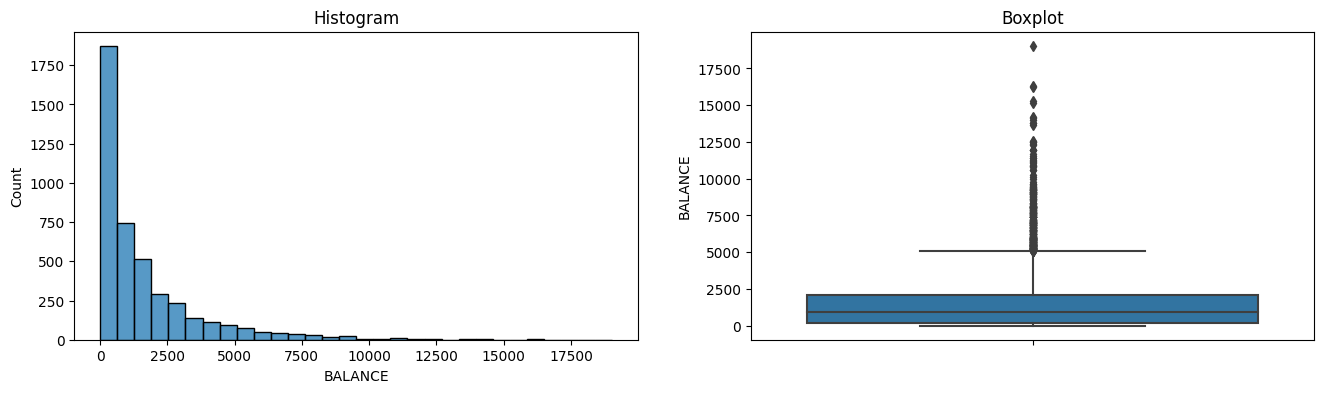

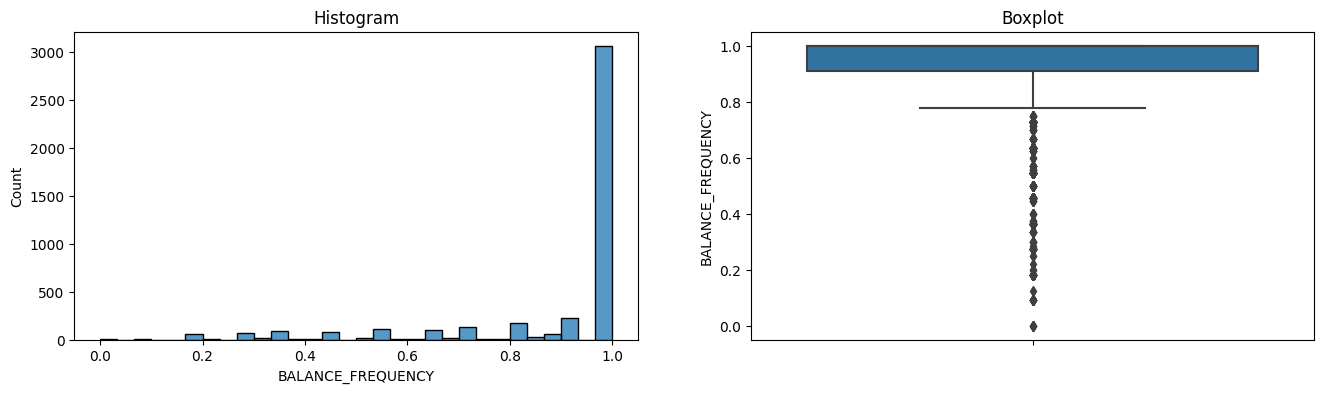

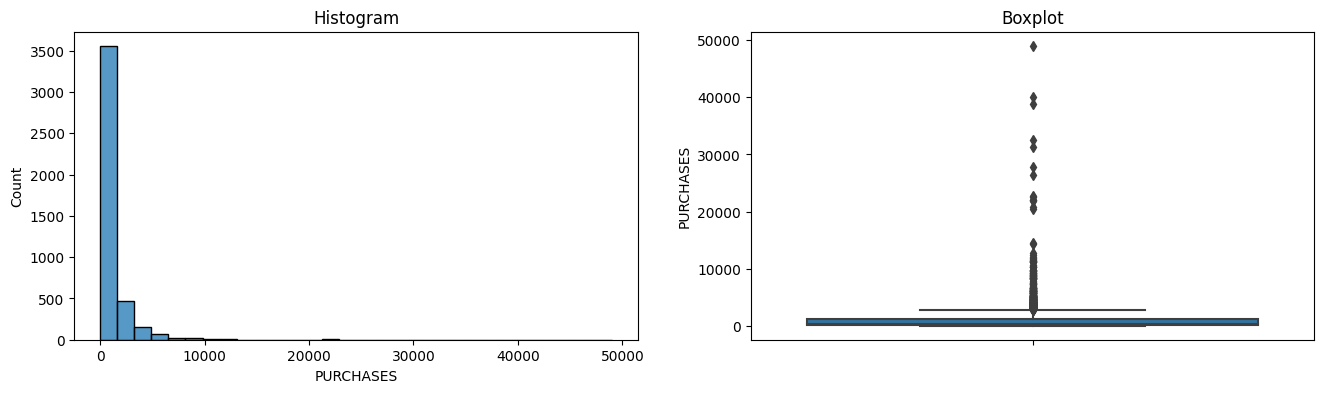

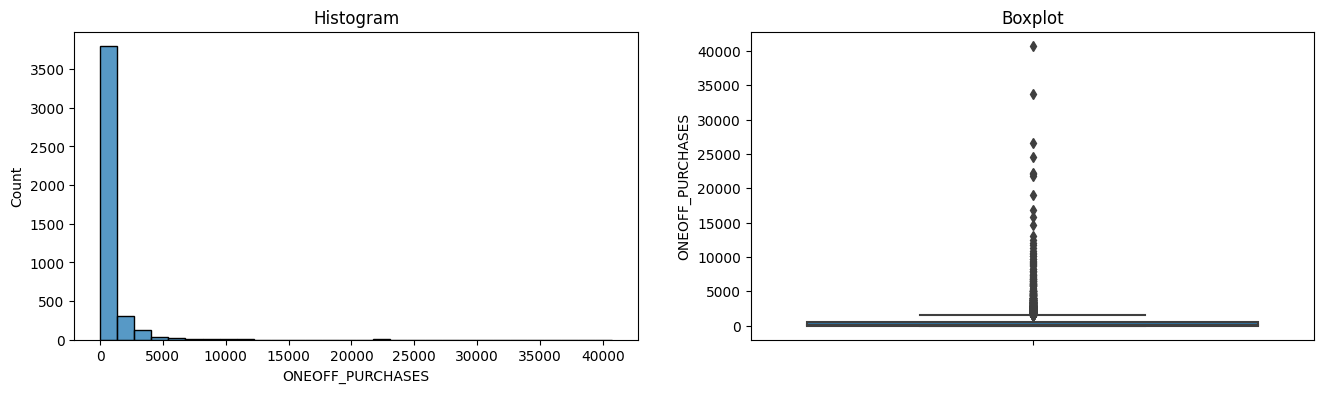

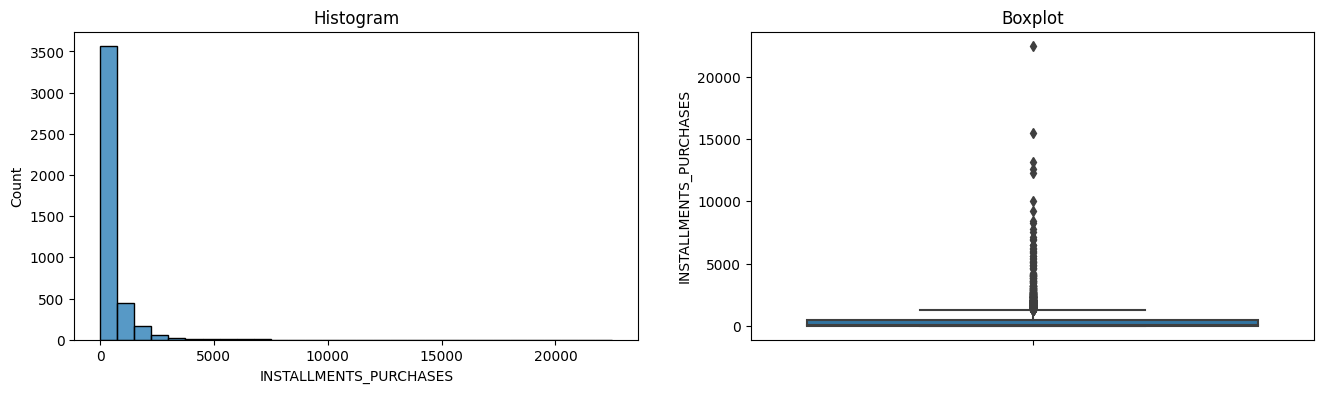

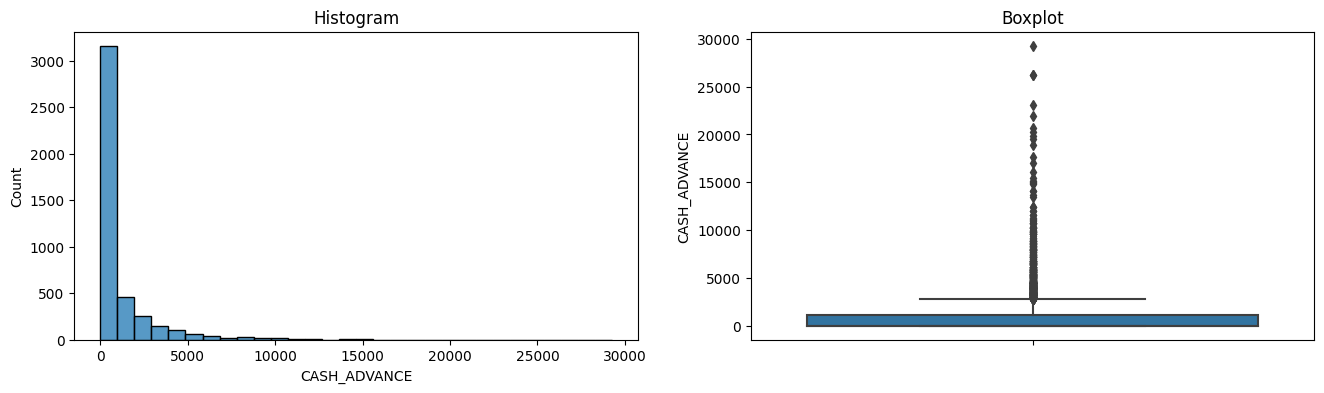

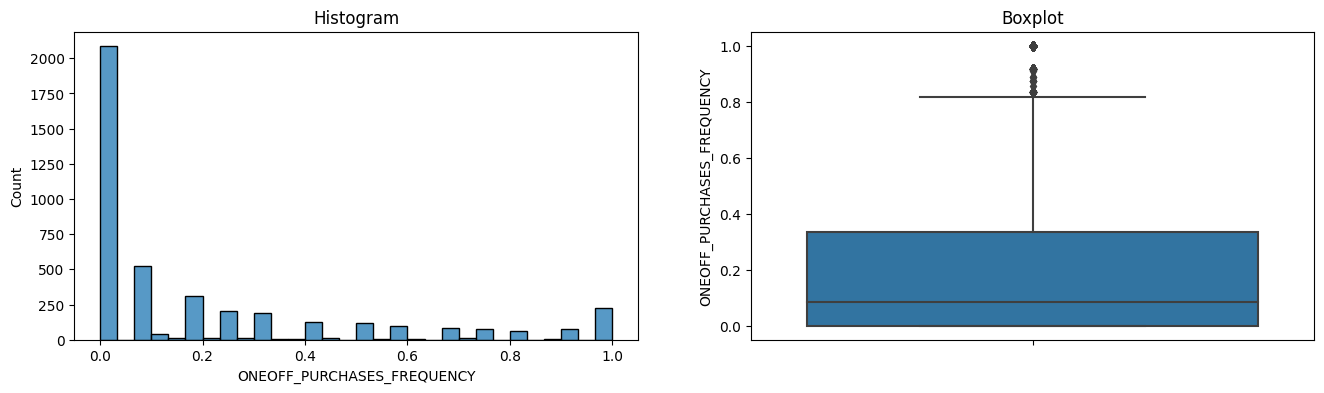

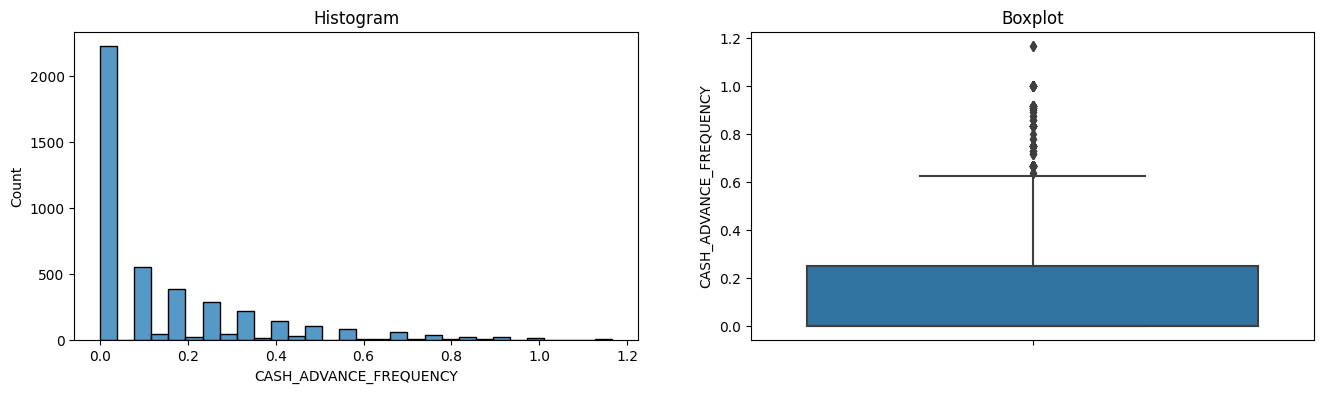

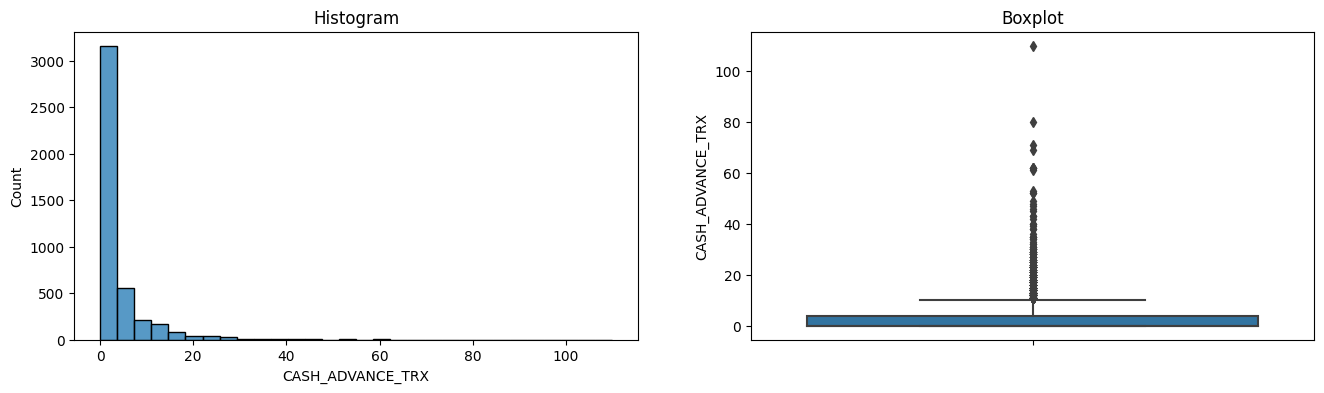

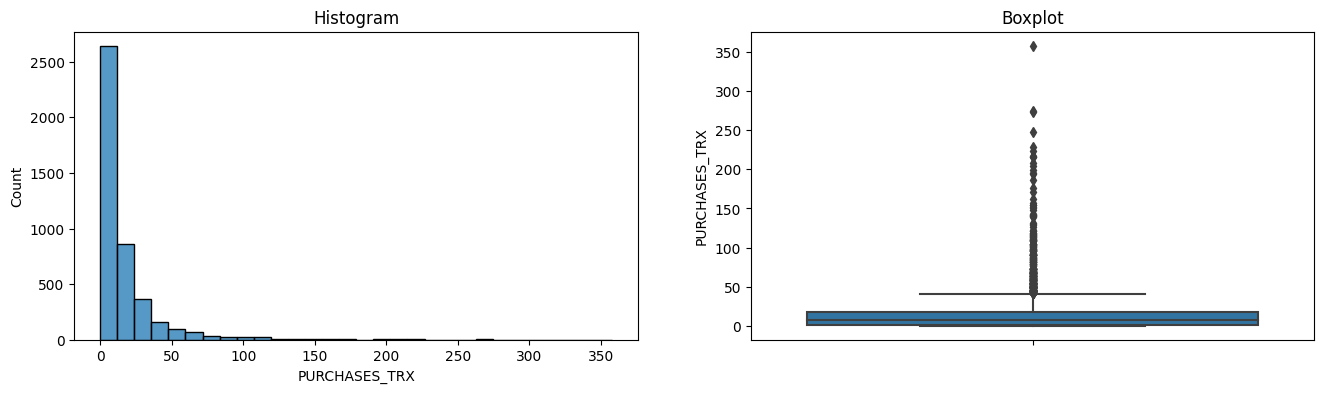

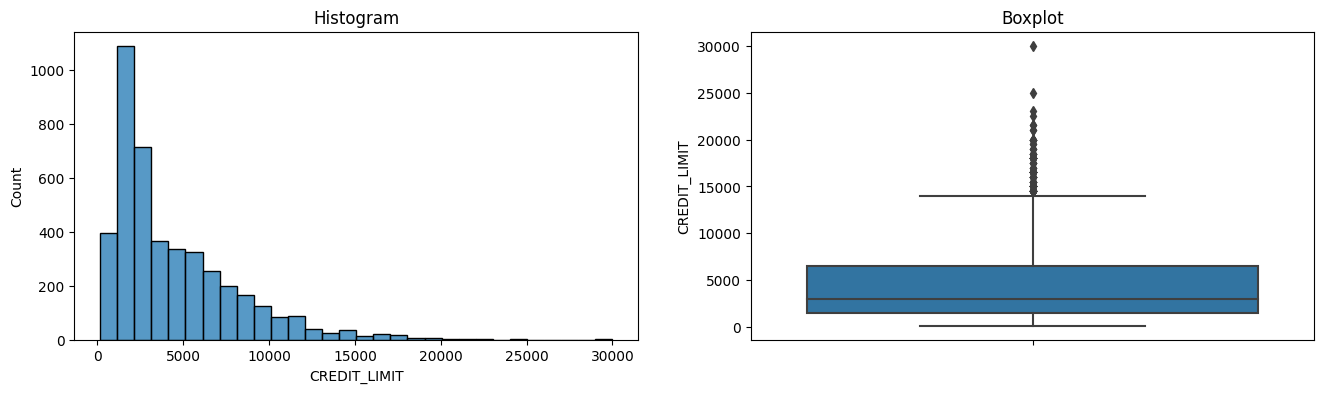

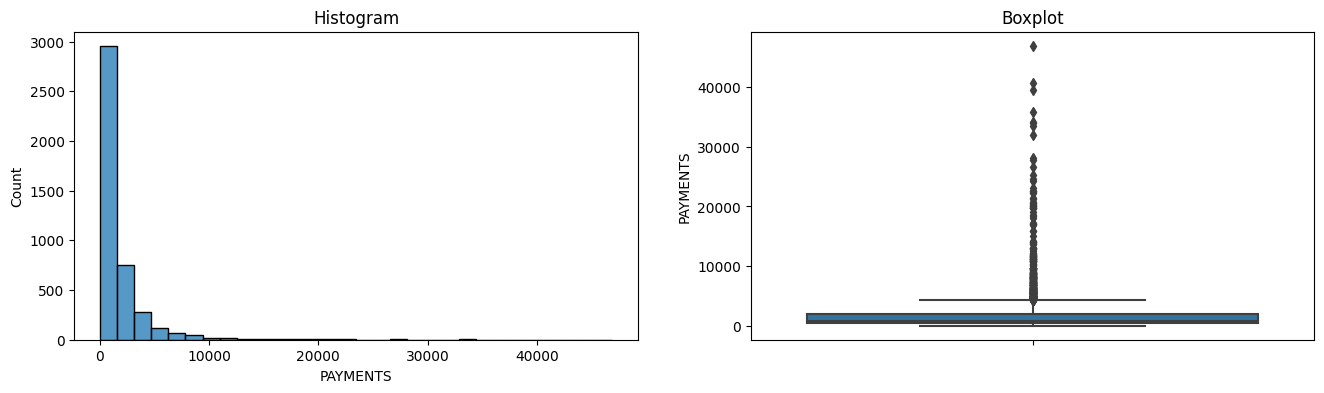

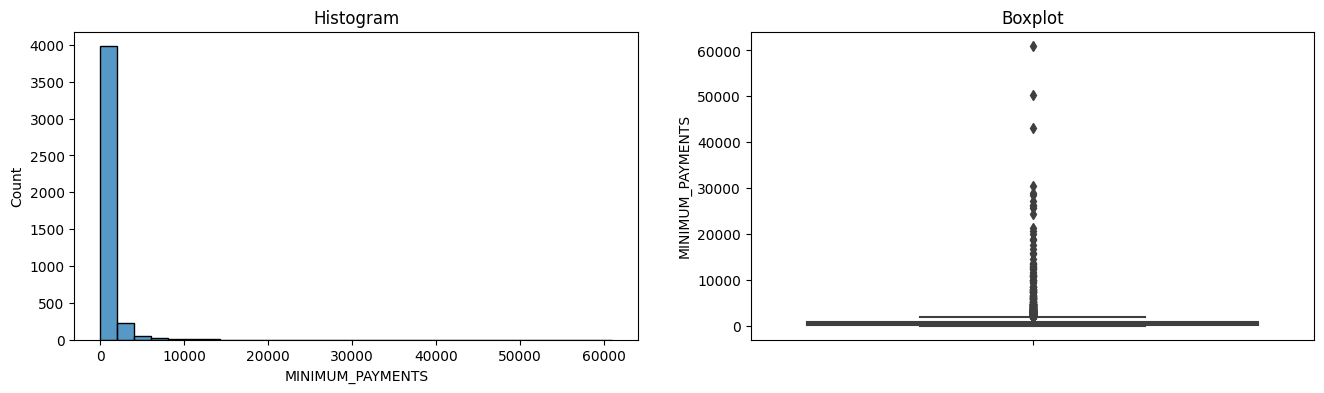

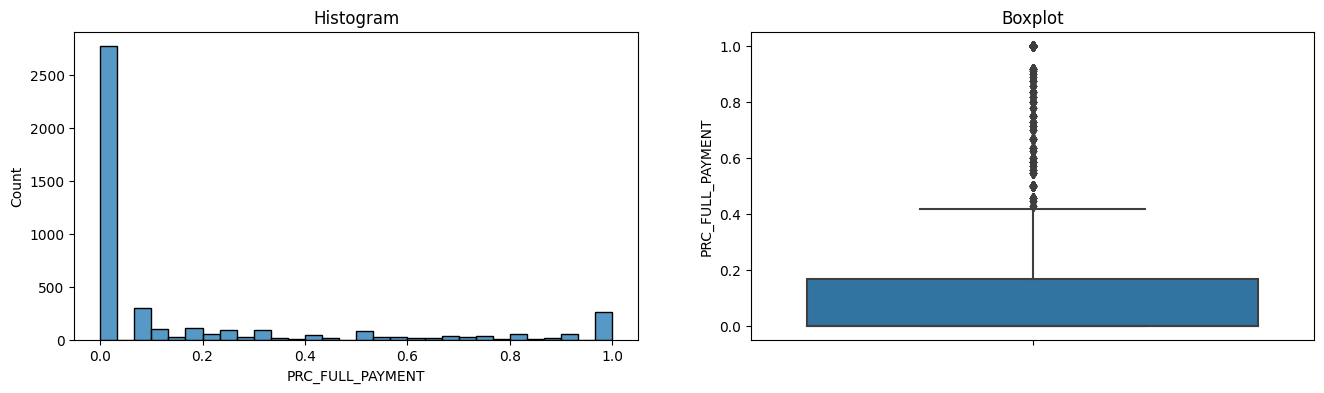

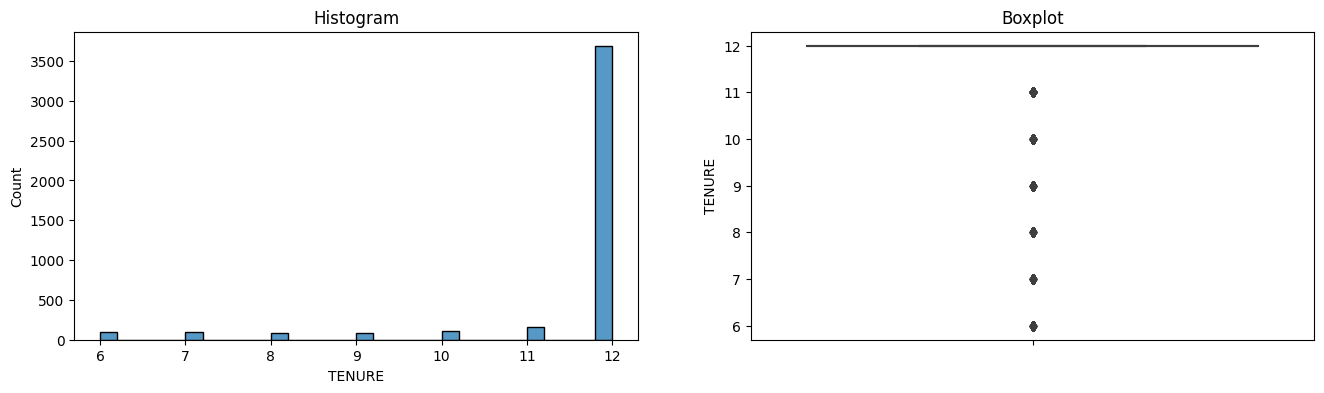

In [19]:
# melihat outlier pada data diatas

diagnostic_plots(X_skew, 'BALANCE')
diagnostic_plots(X_skew, 'BALANCE_FREQUENCY')
diagnostic_plots(X_skew, 'PURCHASES')
diagnostic_plots(X_skew, 'ONEOFF_PURCHASES')
diagnostic_plots(X_skew, 'INSTALLMENTS_PURCHASES')
diagnostic_plots(X_skew, 'CASH_ADVANCE')
diagnostic_plots(X_skew, 'ONEOFF_PURCHASES_FREQUENCY')
diagnostic_plots(X_skew, 'CASH_ADVANCE_FREQUENCY')
diagnostic_plots(X_skew, 'CASH_ADVANCE_TRX')
diagnostic_plots(X_skew, 'PURCHASES_TRX')
diagnostic_plots(X_skew, 'CREDIT_LIMIT')
diagnostic_plots(X_skew, 'PAYMENTS')
diagnostic_plots(X_skew, 'MINIMUM_PAYMENTS')
diagnostic_plots(X_skew, 'PRC_FULL_PAYMENT')
diagnostic_plots(X_skew, 'TENURE')

dari histogram dan boxplot yang telah saya tampilkan diatas, terlihat bahwa terdapat berapa yang sangat tidak normal persebarannya. sehingga saya coba untuk handling outliernya dengan cara menghilangkan.

### mencari iqr

In [20]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

membuat rumus mencari IQR

In [21]:

# Nilai batas 'BALANCE'
upper_BALANCE, lower_BALANCE = find_skewed_boundaries(df_drop, 'BALANCE', 3)

# Nilai batas 'BALANCE_FREQUENCY'
upper_BALANCE_FREQUENCY, lower_BALANCE_FREQUENCY = find_skewed_boundaries(df_drop, 'BALANCE_FREQUENCY', 3)

# Nilai batas 'PURCHASES'
upper_PURCHASES, lower_PURCHASES = find_skewed_boundaries(df_drop, 'PURCHASES', 3)

# Nilai batas 'ONEOFF_PURCHASES'
upper_ONEOFF_PURCHASES, lower_ONEOFF_PURCHASES = find_skewed_boundaries(df_drop, 'ONEOFF_PURCHASES', 3)

# Nilai batas 'INSTALLMENTS_PURCHASES'
upper_INSTALLMENTS_PURCHASES, lower_INSTALLMENTS_PURCHASES = find_skewed_boundaries(df_drop, 'INSTALLMENTS_PURCHASES', 3)

# Nilai batas 'CASH_ADVANCE'
upper_CASH_ADVANCE, lower_CASH_ADVANCE = find_skewed_boundaries(df_drop, 'CASH_ADVANCE', 3)

# Nilai batas 'ONEOFF_PURCHASES_FREQUENCY'
upper_ONEOFF_PURCHASES_FREQUENCY, lower_ONEOFF_PURCHASES_FREQUENCY = find_skewed_boundaries(df_drop, 'ONEOFF_PURCHASES_FREQUENCY', 3)

# Nilai batas 'CASH_ADVANCE_FREQUENCY'
upper_CASH_ADVANCE_FREQUENCY, lower_CASH_ADVANCE_FREQUENCY = find_skewed_boundaries(df_drop, 'CASH_ADVANCE_FREQUENCY', 3)

# Nilai batas 'CASH_ADVANCE_TRX'
upper_CASH_ADVANCE_TRX, lower_CASH_ADVANCE_TRX = find_skewed_boundaries(df_drop, 'CASH_ADVANCE_TRX', 3)

# Nilai batas 'PURCHASES_TRX'
upper_PURCHASES_TRX, lower_PURCHASES_TRX = find_skewed_boundaries(df_drop, 'PURCHASES_TRX', 3)

# Nilai batas 'CREDIT_LIMIT'
upper_CREDIT_LIMIT, lower_CREDIT_LIMIT = find_skewed_boundaries(df_drop, 'CREDIT_LIMIT', 3)

# Nilai batas 'PAYMENTS'
upper_PAYMENTS, lower_PAYMENTS = find_skewed_boundaries(df_drop, 'PAYMENTS', 3)

# Nilai batas 'MINIMUM_PAYMENTS'
upper_MINIMUM_PAYMENTS, lower_MINIMUM_PAYMENTS = find_skewed_boundaries(df_drop, 'MINIMUM_PAYMENTS', 3)

# Nilai batas 'PRC_FULL_PAYMENT'
upper_PRC_FULL_PAYMENT, lower_PRC_FULL_PAYMENT = find_skewed_boundaries(df_drop, 'PRC_FULL_PAYMENT', 3)

# Nilai batas 'TENURE'
upper_TENURE, lower_TENURE = find_skewed_boundaries(df_drop, 'TENURE', 3)


membuat fungsi mencari IQR yang memiliki titik yang sangat ekstrim.

In [22]:
outliers_skew1 = np.where(df_drop['BALANCE'] > upper_BALANCE, True,
                       np.where(df_drop['BALANCE'] < lower_BALANCE, True, False))

outliers_skew2 = np.where(df_drop['BALANCE_FREQUENCY'] > upper_BALANCE_FREQUENCY, True,
                       np.where(df_drop['BALANCE_FREQUENCY'] < lower_BALANCE_FREQUENCY, True, False))

outliers_skew3 = np.where(df_drop['PURCHASES'] > upper_PURCHASES, True,
                       np.where(df_drop['PURCHASES'] < lower_PURCHASES, True, False))

outliers_skew4 = np.where(df_drop['ONEOFF_PURCHASES'] > upper_ONEOFF_PURCHASES, True,
                       np.where(df_drop['ONEOFF_PURCHASES'] < lower_ONEOFF_PURCHASES, True, False))

outliers_skew5 = np.where(df_drop['INSTALLMENTS_PURCHASES'] > upper_INSTALLMENTS_PURCHASES, True,
                       np.where(df_drop['INSTALLMENTS_PURCHASES'] < lower_INSTALLMENTS_PURCHASES, True, False))

outliers_skew6 = np.where(df_drop['CASH_ADVANCE'] > upper_CASH_ADVANCE, True,
                       np.where(df_drop['CASH_ADVANCE'] < lower_CASH_ADVANCE, True, False))

outliers_skew7 = np.where(df_drop['ONEOFF_PURCHASES_FREQUENCY'] > upper_ONEOFF_PURCHASES_FREQUENCY, True,
                       np.where(df_drop['ONEOFF_PURCHASES_FREQUENCY'] < lower_ONEOFF_PURCHASES_FREQUENCY, True, False))

outliers_skew8 = np.where(df_drop['CASH_ADVANCE_FREQUENCY'] > upper_CASH_ADVANCE_FREQUENCY, True,
                       np.where(df_drop['CASH_ADVANCE_FREQUENCY'] < lower_CASH_ADVANCE_FREQUENCY, True, False))

outliers_skew9 = np.where(df_drop['CASH_ADVANCE_TRX'] > upper_CASH_ADVANCE_TRX, True,
                       np.where(df_drop['CASH_ADVANCE_TRX'] < lower_CASH_ADVANCE_TRX, True, False))

outliers_skew10 = np.where(df_drop['PURCHASES_TRX'] > upper_PURCHASES_TRX, True,
                       np.where(df_drop['PURCHASES_TRX'] < lower_PURCHASES_TRX, True, False))

outliers_skew11 = np.where(df_drop['CREDIT_LIMIT'] > upper_CREDIT_LIMIT, True,
                       np.where(df_drop['CREDIT_LIMIT'] < lower_CREDIT_LIMIT, True, False))

outliers_skew12 = np.where(df_drop['PAYMENTS'] > upper_PAYMENTS, True,
                       np.where(df_drop['PAYMENTS'] < lower_PAYMENTS, True, False))

outliers_skew13 = np.where(df_drop['MINIMUM_PAYMENTS'] > upper_MINIMUM_PAYMENTS, True,
                       np.where(df_drop['MINIMUM_PAYMENTS'] < lower_MINIMUM_PAYMENTS, True, False))

outliers_skew14 = np.where(df_drop['PRC_FULL_PAYMENT'] > upper_PRC_FULL_PAYMENT, True,
                       np.where(df_drop['PRC_FULL_PAYMENT'] < lower_PRC_FULL_PAYMENT, True, False))

outliers_skew15 = np.where(df_drop['TENURE'] > upper_TENURE, True,
                       np.where(df_drop['TENURE'] < lower_TENURE, True, False))


saya mencoba menghapus data yang melebihi outlier.

In [23]:
# Melakukan pemangkasan data yang mengandung outliers pada trai_clean

data_trim = df_drop.loc[~(outliers_skew1 + outliers_skew2 + outliers_skew3 + outliers_skew4
                             + outliers_skew5 + outliers_skew6 + outliers_skew7 + outliers_skew8
                             + outliers_skew9 + outliers_skew10 + outliers_skew11 + outliers_skew12
                             + outliers_skew13 + outliers_skew14 + outliers_skew15)]
print('dataset data_train - sebelum dipangkas : ', df_drop.shape)
print('dataset data_train - sesudah dipangkas : ', data_trim.shape)

dataset data_train - sebelum dipangkas :  (4316, 17)
dataset data_train - sesudah dipangkas :  (2301, 17)


setelah dilakukan penghilangan data, dapat disimpulkan bahwa metode handling outlier dengan cara menghilangkan data sangat tidak bagus. hal ini dikarenakan data yang hilang akan mencapai 50%. sehingga perlu saya lakukan dengan metode lain.

#### winsorizer

disini saya akan menggunakan modul winsorizer untuk menghandling outlier.

In [24]:
df_normal = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'TENURE']
df_skew = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
X_normal = df_drop[df_normal]
X_skew = df_drop[df_skew]

setelah dilakukan pengelompokkan, maka didapati bahwa label data `TENURE` saya pisahkan. hal ini dikarenakan bila saya lakukan imputasi dengan metode mengganti data outlier dengan nilai IQR nya maka akan terjadi data yang sangat aneh, hal ini dikarenakan range data tersebut terlalu kecil sehingga akan membuat data menjadi jelek.

In [25]:
# Melakukan metode capping menggunakan windsoriser() to mengatur sedemikian rupa sehingga nilai ekstrem pada 'X_skew' berada di nilai batas atasnya (IQR, fold 3, dipilih karena nilai skewnessnya > 1.0)

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, 
                        variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                      'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                      'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                      'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

winsorizer.fit(X_skew)

Winsorizer(capping_method='iqr', tail='both',
           variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                      'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                      'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                      'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

dilakukan proses imputasi dengan metode IQR di fold 3.

In [26]:
# Malakukan transformasi menggunakan winsorizer untuk nilai ekstrem tersebut pada X_skew

X_skew = winsorizer.transform(X_skew)

In [27]:
# Memeriksa kembali nilai yang telah dilakukan metode capping tadi pada informasi deskriptif statistik describe()

X_skew.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4316.0,1551.843300,1899.267927,0.000000,152.877191,916.693628,2112.447004,7991.156441
BALANCE_FREQUENCY,4316.0,0.923875,0.133211,0.636364,0.909091,1.000000,1.000000,1.000000
PURCHASES,4316.0,859.382707,1159.646068,0.000000,44.662500,379.300000,1149.940000,4465.772500
ONEOFF_PURCHASES,4316.0,439.349069,705.611531,0.000000,0.000000,35.955000,600.000000,2400.000000
INSTALLMENTS_PURCHASES,4316.0,358.470403,537.750853,0.000000,0.000000,95.845000,498.592500,1994.370000
CASH_ADVANCE,4316.0,798.060602,1316.475278,0.000000,0.000000,0.000000,1110.248526,4440.994105
ONEOFF_PURCHASES_FREQUENCY,4316.0,0.205447,0.299252,0.000000,0.000000,0.083333,0.333333,1.000000
CASH_ADVANCE_FREQUENCY,4316.0,0.136159,0.200145,0.000000,0.000000,0.000000,0.250000,1.000000
CASH_ADVANCE_TRX,4316.0,2.801668,4.434778,0.000000,0.000000,0.000000,4.000000,16.000000
PURCHASES_TRX,4316.0,13.182576,16.715173,0.000000,1.000000,7.000000,17.000000,65.000000


In [28]:
X_skew.skew()

BALANCE                       1.755424
BALANCE_FREQUENCY            -1.432554
PURCHASES                     1.797555
ONEOFF_PURCHASES              1.723017
INSTALLMENTS_PURCHASES        1.769336
CASH_ADVANCE                  1.711069
ONEOFF_PURCHASES_FREQUENCY    1.494505
CASH_ADVANCE_FREQUENCY        1.773797
CASH_ADVANCE_TRX              1.765607
PURCHASES_TRX                 1.742907
CREDIT_LIMIT                  1.468192
PAYMENTS                      1.748119
MINIMUM_PAYMENTS              1.780386
PRC_FULL_PAYMENT              1.524826
dtype: float64

setelah dicek menggunakan nilai skewnya. maka didapati bahwa data yang didapatkan lebih berimbang persebarannya. 

## scale

disini saya menggunakan 2 metode scale. yaitu standardScaller untuk data yang memiliki persebaran normal dan metode minmaxscaller untuk data yang persebarannya tidak normal.

In [29]:
scaler = StandardScaler()
scaler.fit(X_normal)

X_scaled = scaler.transform(X_normal)
X_scaled

array([[-0.92780717, -0.92876018, -2.66644606],
       [-0.92780717, -0.92876018, -2.66644606],
       [-0.92780717, -0.92876018, -2.66644606],
       ...,
       [ 1.26233441, -0.01549384, -0.40131395],
       [-0.10294979, -0.92876018, -0.40131395],
       [ 1.03478746,  1.12609159, -0.40131395]])

In [30]:
scaler_2 = MinMaxScaler()
scaler_2.fit(X_skew)

X_scaled_2 = scaler_2.transform(X_skew)
X_scaled_2

array([[0.11807853, 0.65624966, 0.02306432, ..., 0.0322284 , 0.1459132 ,
        0.        ],
       [0.0577458 , 1.        , 0.13099637, ..., 0.03876762, 0.05391439,
        0.        ],
       [0.13184509, 1.        , 0.32469186, ..., 0.06005962, 0.08073558,
        0.        ],
       ...,
       [0.42377983, 1.        , 0.12561768, ..., 0.15834628, 0.31497585,
        0.        ],
       [0.60573781, 1.        , 0.3573693 , ..., 0.13795808, 0.84497723,
        0.13636323],
       [0.24739937, 1.        , 0.23109999, ..., 0.46724644, 0.32374148,
        0.13636323]])

## concate

setelah di scalling berdasarkan kelompok datanya masing-masing, maka akan saya coba gabungkan kembali agar menjadi kesatuan data seperti awalnya.

In [31]:
merged_columns = df_normal + df_skew

In [32]:
X_final = np.concatenate([X_scaled, X_scaled_2], axis=1)
X_final_df = pd.DataFrame(X_final, columns=merged_columns)
X_final_df

,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,TENURE,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.927807,-0.928760,-2.666446,0.118079,0.65625,0.023064,0.042917,0.000000,0.000000,0.125000,0.000000,0.0000,0.015385,0.039813,0.032228,0.145913,0.000000
1,-0.927807,-0.928760,-2.666446,0.057746,1.00000,0.130996,0.243750,0.000000,0.000000,0.125000,0.000000,0.0000,0.015385,0.039813,0.038768,0.053914,0.000000
2,-0.927807,-0.928760,-2.666446,0.131845,1.00000,0.324692,0.604167,0.000000,0.000000,0.125000,0.000000,0.0000,0.015385,0.063232,0.060060,0.080736,0.000000
3,-0.927807,-0.928760,-2.666446,0.279964,1.00000,0.026871,0.050000,0.000000,0.000000,0.125000,0.000000,0.0000,0.015385,0.110070,0.051793,0.253452,0.000000
4,-0.927807,-0.928760,-2.666446,0.053183,0.00000,0.268711,0.500000,0.000000,0.000000,0.125000,0.000000,0.0000,0.015385,0.049180,0.008027,0.020151,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,-1.240685,-0.928760,-0.401314,0.135025,1.00000,0.000000,0.000000,0.000000,0.283624,0.000000,0.545455,0.5625,0.000000,0.049180,0.210503,0.096456,0.136363
4312,-1.240685,-0.928760,-0.401314,0.101310,0.75000,0.000000,0.000000,0.000000,0.860094,0.000000,0.545455,0.4375,0.000000,0.187354,0.668705,0.085891,0.136363
4313,1.262334,-0.015494,-0.401314,0.423780,1.00000,0.125618,0.178008,0.067069,0.452186,0.727273,0.545455,0.5625,0.307692,0.466042,0.158346,0.314976,0.000000
4314,-0.102950,-0.928760,-0.401314,0.605738,1.00000,0.357369,0.664971,0.000000,0.981610,0.454545,0.545455,1.0000,0.384615,0.274005,0.137958,0.844977,0.136363


## vif

setelah dilakukan penggabungan pada data diatas, maka saya akan mencoba melihat korelasi antara feature 1 dan lainnya.

In [33]:
vif = pd.DataFrame()
vif['Features'] = merged_columns
vif['VIF'] = [variance_inflation_factor(X_final_df.values, i) for i in range(X_final_df.shape[1])]

vif

,Features,VIF
0,PURCHASES_FREQUENCY,10.433300
1,PURCHASES_INSTALLMENTS_FREQUENCY,11.785175
2,TENURE,1.143226
3,BALANCE,7.642440
4,BALANCE_FREQUENCY,3.652871
5,PURCHASES,36.556345
6,ONEOFF_PURCHASES,20.140584
7,INSTALLMENTS_PURCHASES,11.381112
8,CASH_ADVANCE,4.606068
9,ONEOFF_PURCHASES_FREQUENCY,9.003407


Terdapat 'rule of thumb' dalam mengintepretasikan hasil nilai VIF sebagai berikut:
- 1 — features tidak berkorelasi terhadap sesama features lainnya
- 1 < VIF < 5 — features berkorelasi cukup terhadap sesama features lainnya
- VIF > 5 — features berkorelasi kuat terhadap sesama features lainnya
- VIF > 10 — features berkorelasi sangat kuat terhadap sesama features lainnya

Apabila nilai VIF > 10, maka menjadi sinyal pertanda model memiliki permasalahan multikolinieritas, dimana menyalahi asumsi dasar dalam regresi. VIF > 5 pun patut dicurigai memiliki permasalahan yang serupa terkait multikolinieritas.

Berdasarkan nilai VIF di atas, setidaknya terdapat 4 *features* yang nilai VIF nya < 5 atau nilainya tidak saling berkaitan satu sama lain, yaitu `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, dan `PRC_FULL_PAYMENT`. Maka praduga awal jumlah dimensi setalah dilakukan *dimensionality reduction* ialah setidaknya 4 *features*. Namun perlu dilakukan prosedur pemeriksaan mendetail terkait PCA-nya.

## Dimensionality Reduction

In [34]:
# Melakukan dimensionality reduction berdasarkan kriteria keterwakilan informasi sebesar 90% yang dianggap sudah cukup representatif
pca = PCA()
pca.fit(X_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)
a = np.argmax(cumsum >= 0.9) + 1
a

5

In [35]:
pca = PCA(n_components = 10)
pca.fit(X_final)

b = pca.explained_variance_ratio_
b

array([0.50085449, 0.24512542, 0.06887954, 0.06091056, 0.03387841,
       0.02392183, 0.0192195 , 0.0137221 , 0.00753223, 0.00657439])

In [36]:
b.sum()

0.9806184706345678

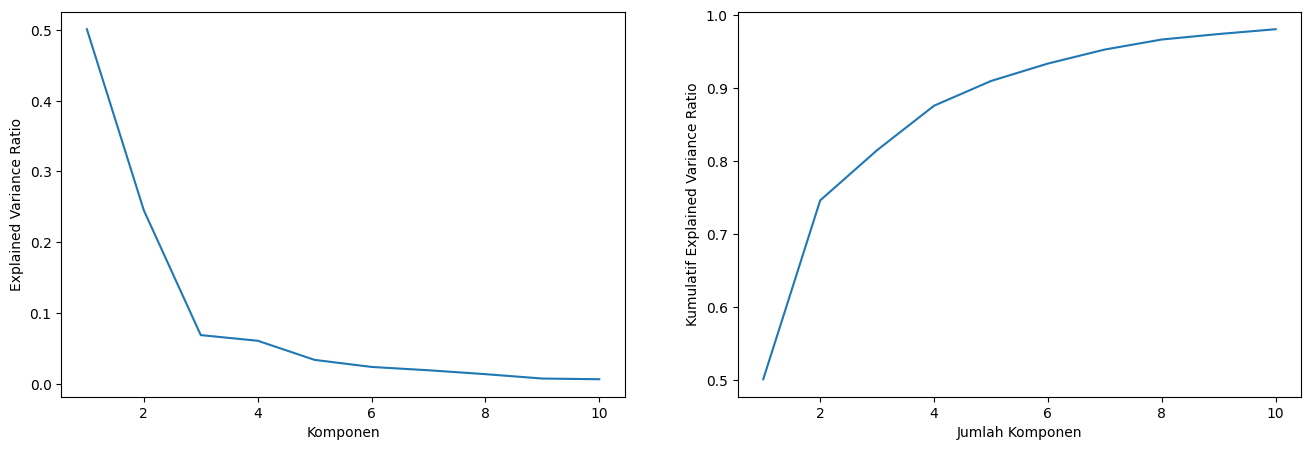

In [37]:
# Visualisasi nilai EVR berdasarkan banyak komponen

fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1, 11),b)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1, 11),np.cumsum(b))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Variance Ratio')
plt.show()

Berdasarkan visualisasi plot EVR di atas, dapat dilihat bahwa terdapat patahan di 2 komponen, namun den gan cumsum EVR 0.74, dianggap masih belum cukup optimal keterwakilannya. Sementara, dengan 4 komponen merupakan jumlah yang terbaik dengan cumsum EVR sekitar 85%.

In [38]:
pca = pca = PCA(n_components = 4)
pca.fit(X_final)

X_reduced = pca.transform(X_final)

In [39]:
X_reduced

array([[-1.65565083e+00,  2.47478167e+00, -1.61202464e-01,
         2.02167654e-01],
       [-1.60864902e+00,  2.45810181e+00,  1.90898038e-03,
         2.42693951e-01],
       [-1.56160452e+00,  2.44835900e+00,  2.08497876e-01,
         3.71257178e-01],
       ...,
       [ 7.63693001e-01,  5.09644039e-01,  8.67510787e-01,
         7.37089811e-02],
       [-7.89183453e-01,  2.77068722e-01,  1.43684873e+00,
        -1.46252243e-01],
       [ 1.32173074e+00,  5.92898329e-01,  5.66217984e-01,
        -9.81014213e-01]])

# Model Definition

K-means

K-means berguna dalam clustering data dengan membagi data ke dalam beberapa kelompok yang memiliki kesamaan karakteristik. Dengan menggunakan k-means, Anda dapat mengidentifikasi pola dan tren dalam data dan membuat keputusan bisnis yang lebih baik berdasarkan informasi yang dihasilkan. Hal ini juga dapat membantu Anda mempercepat proses analisis data dan mengurangi biaya analisis secara signifikan.

# Model Training

saya mencoba mencari elbow pada nilai k means nya

In [40]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=2).fit(X_reduced)
                for k in range(1, 8)]
inertias = [model.inertia_ for model in kmeans_per_k]

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anaconda3/l

In [41]:
inertias

[15339.277175631523,
 8185.935682350322,
 4925.967789066256,
 3832.257862414616,
 3330.868528973002,
 2927.9078786721066,
 2594.793611530358]

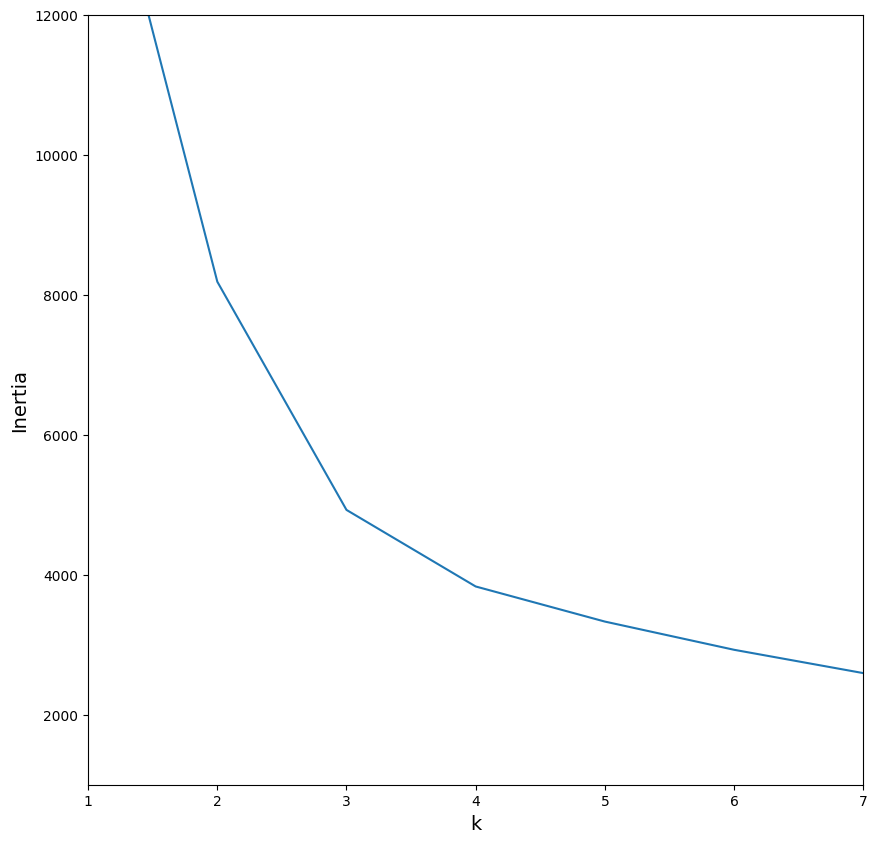

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 8), inertias)
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 7, 1000, 12000])
plt.show()

In [43]:
inertias[1]

8185.935682350322

Berdasarkan evaluasi menggunakan elbow method, bahwa dapat dilihat terdapat patahan/lekukan pada nilai KMeans k=2 dengan nilai Inersia = 4461.59 Untuk selanjutnya, akan dilihat nilai Silhoutte Score apabila konsisten menunjukan nilai score yang paling besar pada jumlah kluster k=2, maka nilai k tersebut yang akan dipilih.

In [44]:
silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

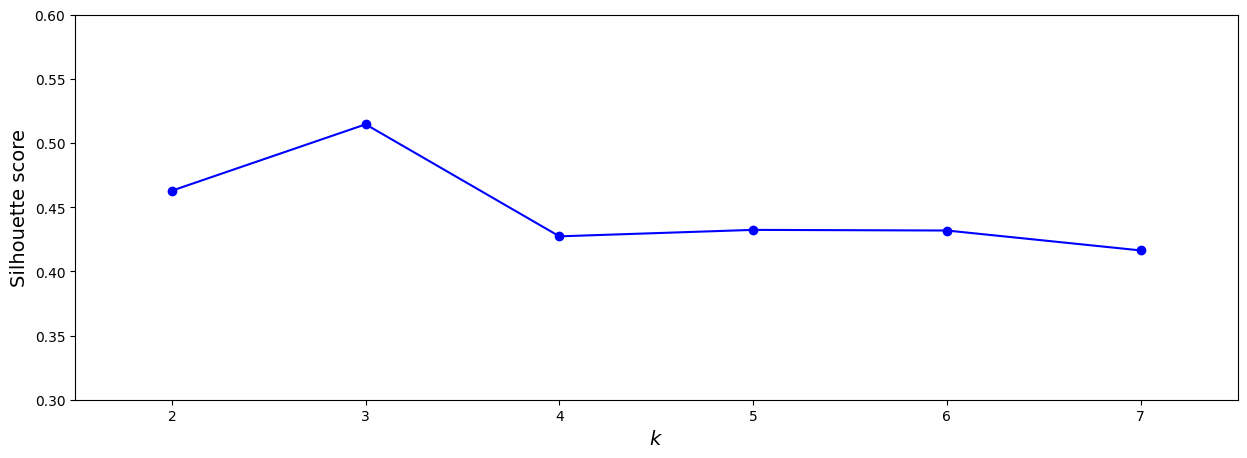

In [45]:
plt.figure(figsize=(15, 5))
plt.plot(range(2, 8), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.5, 7.5, 0.3, 0.6])
plt.show()

In [46]:
silhouette_score(X_reduced, kmeans_per_k[1].labels_)

0.46289232056578195

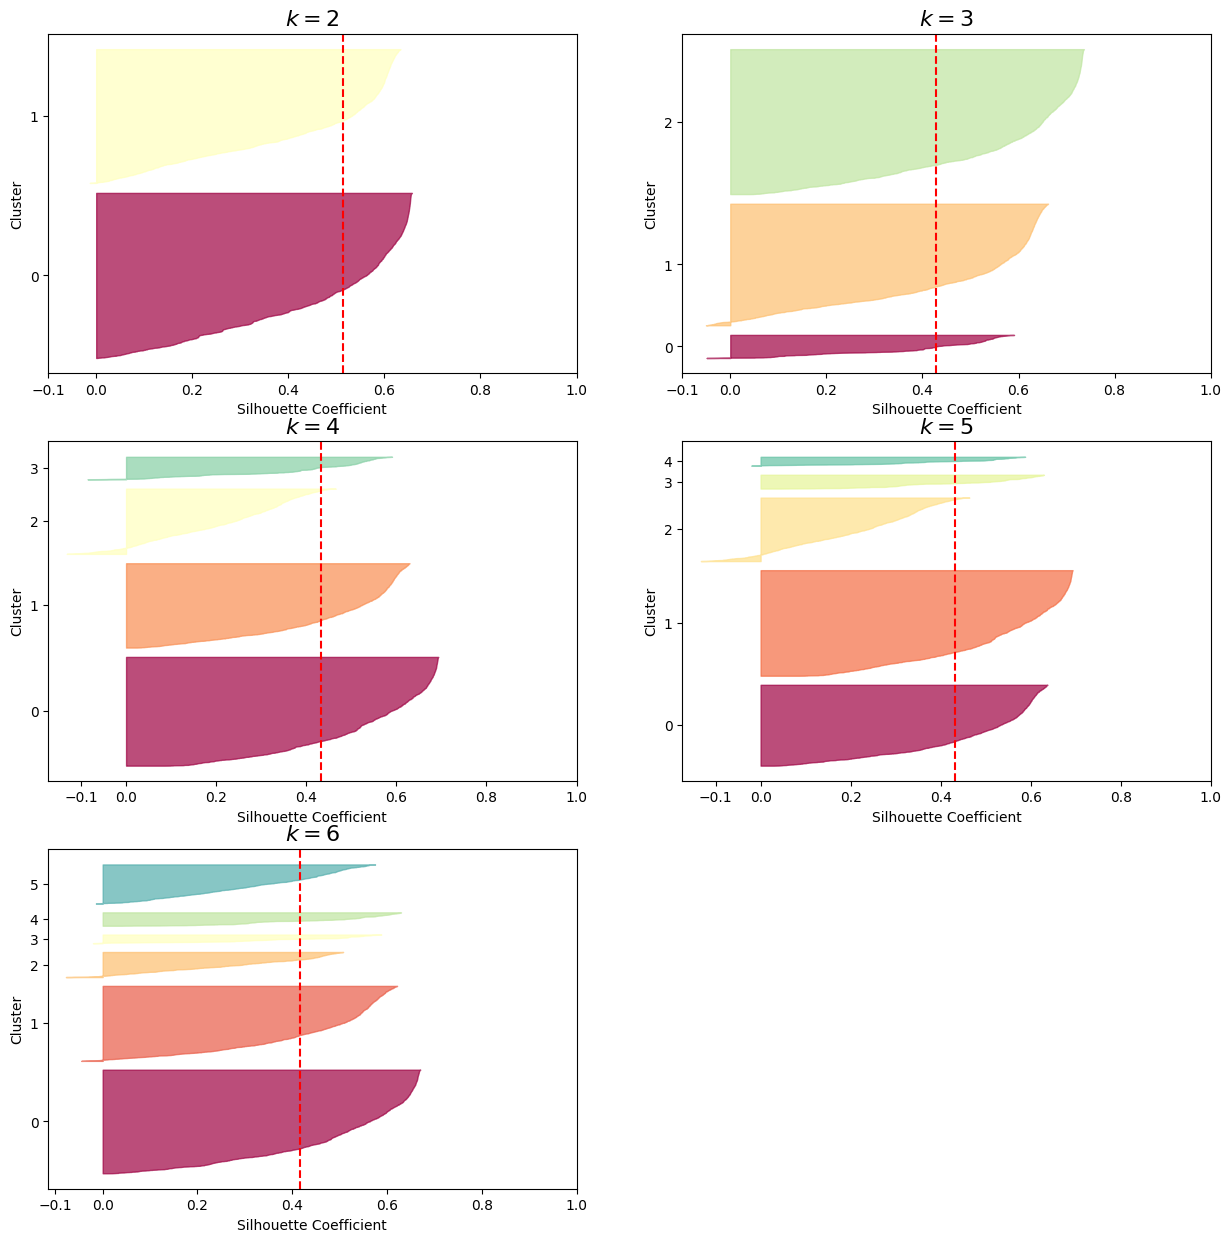

In [47]:
plt.figure(figsize=(15, 15))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_reduced, y_pred)

    padding = len(X_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel("Cluster")
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Berdasarkan evaluasi menggunakan Silhoutte Score dan viluasiasi perpotongan garis merah pada klustering sesuai dengan koefisien silhoutte-nya, bahwa dapat dilihat nilai silhoutte score paling tinggi terjadi pada k=2 dengan skor 0.51 walaupun pada visualisasi diatas hanya menyentuh 0,41 dan evaluasi visualisasinya pun memotong garis batas merah sebagaimana ditunjukan pada visualisasi di atas. sehingga akan kita gunakan 2 cluster data yang berbeda.

## training pada 2 kluster

In [48]:
kmeans = KMeans(n_clusters=2, random_state=25).fit(X_reduced)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Model Evaluation

## kmeans 2 cluster

In [49]:
Kmean_2d = kmeans.transform(X_reduced)

<AxesSubplot: >

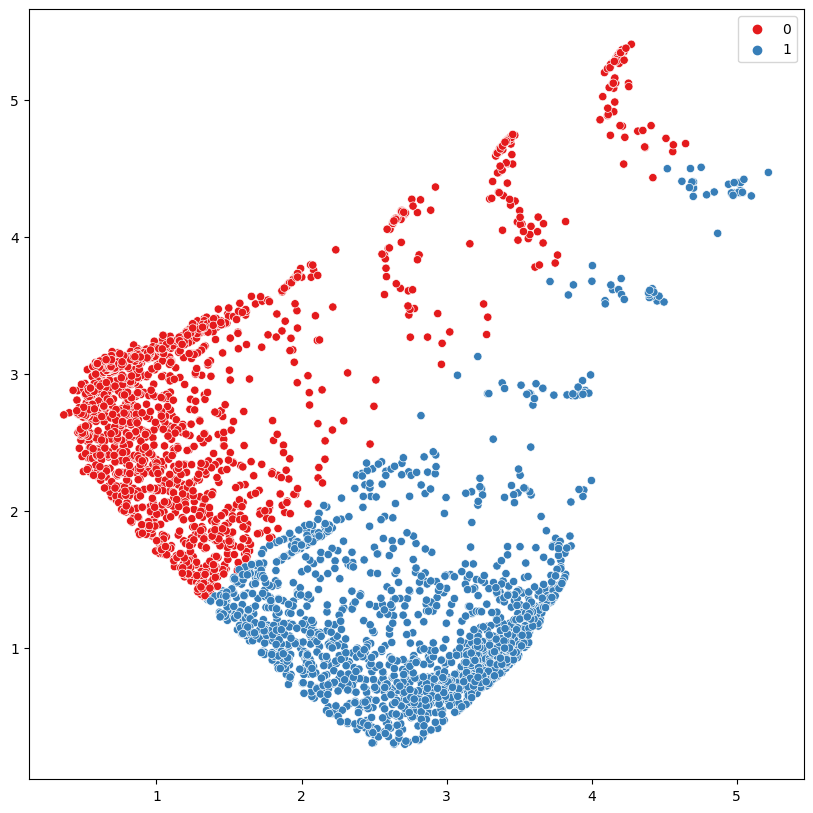

In [50]:
fig,ax=plt.subplots(nrows=1,figsize=(10,10))
sns.scatterplot(x=Kmean_2d[:,0], y=Kmean_2d[:,1], hue=kmeans.labels_, palette='Set1')

Berdasarkan scatterplot pada data, dapat dilihat bahwa clustering dengan menggunakan K-Means default menunjukan hasil yang baik, karena mampu memisahkan kelompok label 0 dan 1 dengan sempurna, dimana tidak terdapat tumpang tindih dan data label 0 dan 1 tidak bercampur di area likelihood.

#### membuat data label.

In [51]:
label = kmeans.labels_

In [52]:
label.shape

(4316,)

In [53]:
label_df = pd.DataFrame(label, columns=['labels'])
label_df.shape

(4316, 1)

In [54]:
label_df.value_counts()

labels
0         2384
1         1932
dtype: int64

In [55]:
df_drop['labels'] = label

/tmp/ipykernel_5760/718392316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['labels'] = label


In [56]:
df_drop

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,0
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,0
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,0
5,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,0
7,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,0
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,0
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,1
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,0


## EDA clustering

<AxesSubplot: xlabel='labels', ylabel='count'>

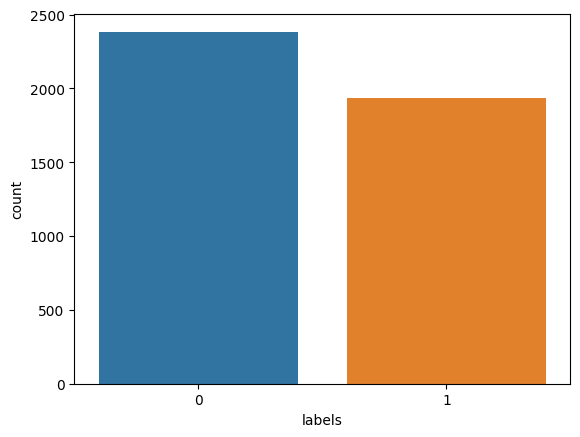

In [57]:
sns.countplot(x=df_drop['labels'])

didapati dari data diatas didapati bahwa label 0 memiliki perolehan data lebih banyak daripada label 1. 

<AxesSubplot: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

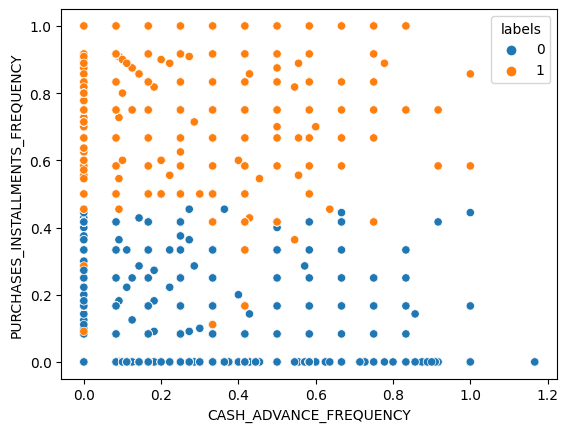

In [58]:
# Melakukan visualisasi hubungan frekuensi pembelian dengan dicicil terhadap frekuensi frekuensi pembelian tunai dengan labels

sns.scatterplot(x=df_drop['CASH_ADVANCE_FREQUENCY'], y=df_drop['PURCHASES_INSTALLMENTS_FREQUENCY'], hue=df_drop['labels'])

<AxesSubplot: xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

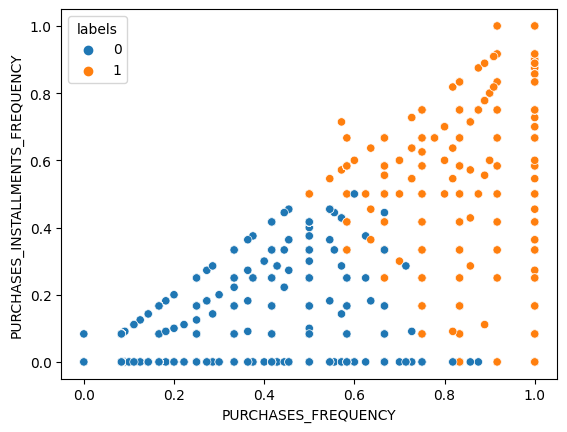

In [59]:
# Melakukan visualisasi hubungan frekuensi pembelian dengan dicicil terhadap frekuensi keseluruhan pembelian dengan labels

sns.scatterplot(x=df_drop['PURCHASES_FREQUENCY'], y=df_drop['PURCHASES_INSTALLMENTS_FREQUENCY'], hue=df_drop['labels'])

<AxesSubplot: xlabel='PURCHASES_FREQUENCY', ylabel='CASH_ADVANCE_FREQUENCY'>

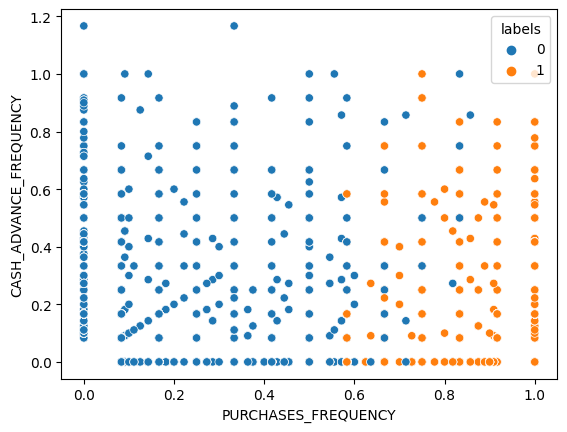

In [60]:
# Melakukan visualisasi hubungan frekuensi pembelian dengan tunai terhadap frekuensi keseluruhan pembelian dengan labels

sns.scatterplot(x=df_drop['PURCHASES_FREQUENCY'], y=df_drop['CASH_ADVANCE_FREQUENCY'], hue=df_drop['labels'])

<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='CASH_ADVANCE'>

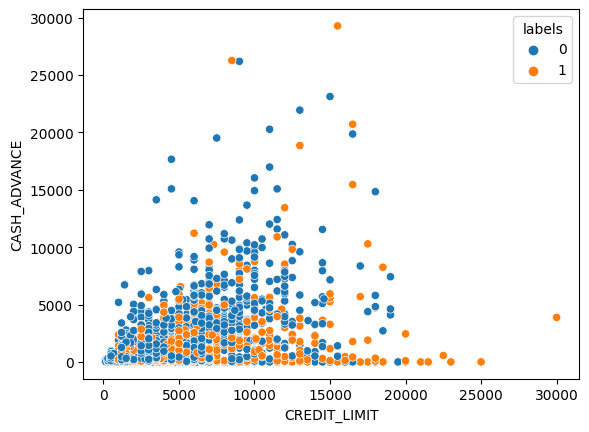

In [61]:
sns.scatterplot(x=df_drop['CREDIT_LIMIT'], y=df_drop['CASH_ADVANCE'], hue=df_drop['labels'])

<AxesSubplot: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

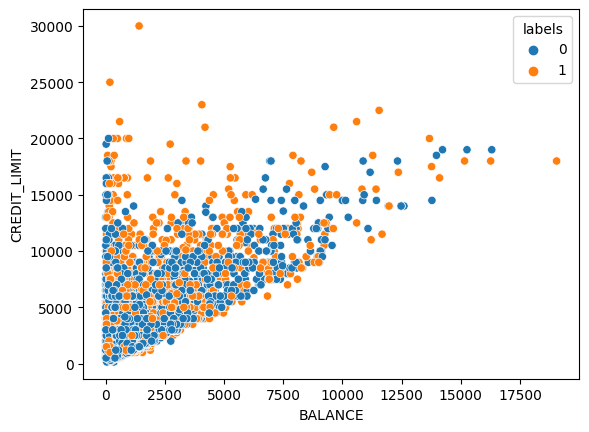

In [62]:
sns.scatterplot(x=df_drop['BALANCE'], y=df_drop['CREDIT_LIMIT'], hue=df_drop['labels'])

Berdasarkan analisis Exploratory Data Analysis sebelumnya pada *features* yang telah dilakukan analisis berdasarkan labels hasil clusteringnya maka dapat disimpulkan sebagai berikut:
 - Labels = 1, merupakan customer dari Credit Card yang aktif menggunakan Credit Card untuk keperluan belanja.
 - Labels = 0, merupakan customer dari Credit Card yang kurang aktif menggunakan Credit Card untuk keperluan belanja.

# Model saving

In [63]:
# Menyimpan pemodelan pickle dan list untuk model inference 

import pickle
import json

with open('pca.pkl', 'wb') as file_1:
  pickle.dump(pca, file_1)

with open('kmeans_base.pkl', 'wb') as file_2:
  pickle.dump(kmeans, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('scaler_2.pkl', 'wb') as file_4:
  pickle.dump(scaler_2, file_4)

with open('list_num_cols_1.txt', 'w') as file_5:
  json.dump(df_normal, file_5)

with open('list_num_cols_2.txt', 'w') as file_6:
  json.dump(df_skew, file_6)

In [64]:
df_drop.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'labels'],
      dtype='object')

# Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia pada k-means adalah ukuran jarak antara titik data dengan pusat klaster terdekat dan digunakan untuk mengukur seberapa tersebar data dalam sebuah klaster. Semakin rendah nilai inertia, semakin padat dan homogen klaster yang terbentuk. Tujuan dari k-means adalah untuk meminimalkan nilai inertia dalam proses pengelompokan data ke dalam klaster yang sesuai.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow method adalah teknik visualisasi yang digunakan untuk menentukan jumlah optimal klaster dalam algoritma k-means clustering. Dalam metode ini, dilakukan plot nilai inertia pada sumbu y dan jumlah klaster pada sumbu x. Kemudian, jumlah klaster optimal ditemukan pada titik "siku" dari kurva, di mana penurunan nilai inertia mulai menurun secara signifikan. kelemahan metode ini ialah dikarenakan interpresentasinya berdasarkan gambar, maka hasil yang didapat itu bersifat objektif. kelebihan metode ini ialah penggunaannya yang mudah sehingga dapat mudah untuk dipahami bagi tiap individu walaupun tidak ada latar belakang data science.

# Kesimpulan

dari data diatas, dapat disimpulkan bahwa data tersebut memiliki banyak outlier sehingga perlu dilakukan pengerjaan outlier. dikarenakan bila outlier dilakukan penanganan dengan cara dihapus bukanlah sebuah opsi, maka perlu dilakukan imputasi nilainya sehingga data yang didapat sudah tidak original. features data diatas dapat dikecilkan menjadi 4 features saja. didapatkan 2 klaster yang terbaik pada dataset diatas, yaitu penggunaan kredit aktif untuk untuk pembelian barang dan yang kurang aktif menggunakan kredit. saran yang dapat diberikan ialah perlu dilakukan clustering dengan metode lain supaya hasil clusternya tidak berpaku pada 1 model saja sehingga hasilnya menjadi lebih robust.

# reference

https://www.fortuneidn.com/finance/surti/skor-kredit-yang-bagus?page=all